# Explore here

It's recommended to use this notebook for exploration purposes.

In [15]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import io


# Select the resource to download
resource_url = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"

# Request to download the file from the Internet
response = requests.get(resource_url, time.sleep(10))
print(response)

# If the request was executed correctly (code 200), then the file could be downloaded
if response:
    # We transform the flat HTML into real HTML (structured and nested, tree-like)
    soup = BeautifulSoup(response.text, 'html')
    soup


html = io.StringIO(response.text)

table = pd.read_html(html)

songs = table[0].copy()

clean_table = (songs.iloc[:-1,:]).copy

conn = sqlite3.connect("songs") 

songs.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Date released", "Reference"]


songs["Song"] = songs["Song"].str.replace(r"\[.*?\]", "", regex=True)
songs["Artist"] = songs["Artist"].str.replace(r"\[.*?\]", "", regex=True)


songs = songs[songs["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)].copy()

songs["Streams (billions)"] = songs["Streams (billions)"].astype(float)


songs["Date released"] = pd.to_datetime(songs["Date released"], errors="coerce")

songs.to_sql("most_streamed", conn, if_exists="replace", index=False)
cursor = conn.cursor()

cursor.execute("SELECT COUNT(*) FROM most_streamed")
print("Rows inserted:", cursor.fetchone()[0])

conn.commit()
conn.close()



<Response [200]>
Rows inserted: 100


In [ ]:
table[0]

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.845,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.366,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.908,8 November 2018,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.899,21 September 2016,[5]
4,5,"""As It Was""",Harry Styles,3.882,1 April 2022,[6]
...,...,...,...,...,...,...
96,97,"""Stay with Me""",Sam Smith,2.296,14 April 2014,[98]
97,98,"""Someone Like You""",Adele,2.296,24 January 2011,[99]
98,99,"""Havana""",Camila Cabello and Young Thug,2.284,3 August 2017,[100]
99,100,"""Memories""",Maroon 5,2.264,20 September 2019,[101]


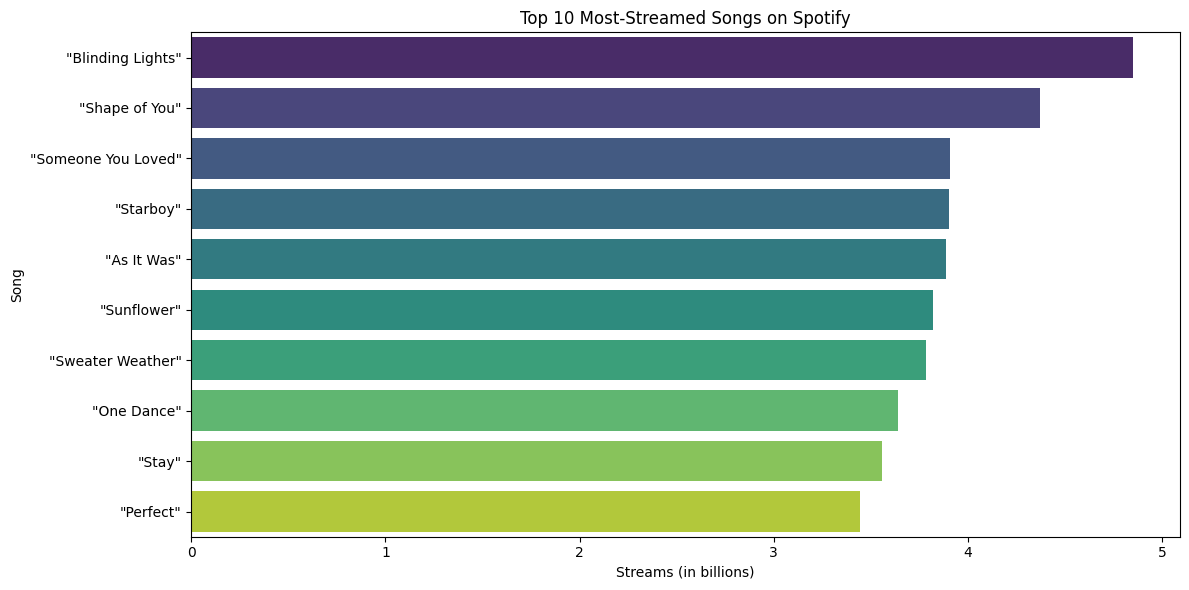

In [16]:
top10 = df.nlargest(10, "Streams (billions)")
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="Streams (billions)", y="Song", hue="Song", palette="viridis", legend=False)
plt.title("Top 10 Most-Streamed Songs on Spotify")
plt.xlabel("Streams (in billions)")
plt.ylabel("Song")
plt.tight_layout()
plt.show()
